# **Introduction**
Point Breeze stands out as the best neighborhood in terms of crime rates, food/restaurant facility violations, and education compared to the other nine neighborhoods. This project analyzes Central Business District, Squirrel Hill South, North Oakland, Shadyside, Troy Hill, Point Breeze, Bloomfield, Central Lawrenceville, Greenfield, and Larimer based on these factors. These ten neighborhoods are located in the northeastern part of Pittsburgh, and the comparison is based solely on data from the past five years. The dataset was filtered to include only recent data, excluding records older than five years (e.g., those from six, seven, or eight years ago). Overall, this project focuses on evaluating the factors that contribute to the quality of life in these neighborhoods.


# **The following three datasets are used in this analysis:**

**Pittsburgh Police Arrest Data**

Arrests

https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

**Allegheny County Restaurant/Food Facility Inspections and Locations**

Food Facility/Restaurant Inspection Violations

https://data.wprdc.org/datastore/dump/1a1329e2-418c-4bd3-af2c-cc334e7559af

**Allegheny County Private Schools Location**

CSV 

https://data.wprdc.org/datastore/dump/25d92d95-f5f7-426b-8f97-97f8af4c49bd

![alt text](https://visit-pittsburgh-2023.s3.amazonaws.com/images/archive/2020-Neighborhood-Map2.jpg?v=1698153851 "MAP")


![alt text](http://localhost:8888/files/CMPINF%200010%20Final%20project/10.png?_xsrf=2%7C994b257c%7C0ad71eb25cd3f3913ec1fe1479208576%7C1731700920)

# **Arrest Data**

The neighborhood with the lowest crime rate over the past five years is Point Breeze.


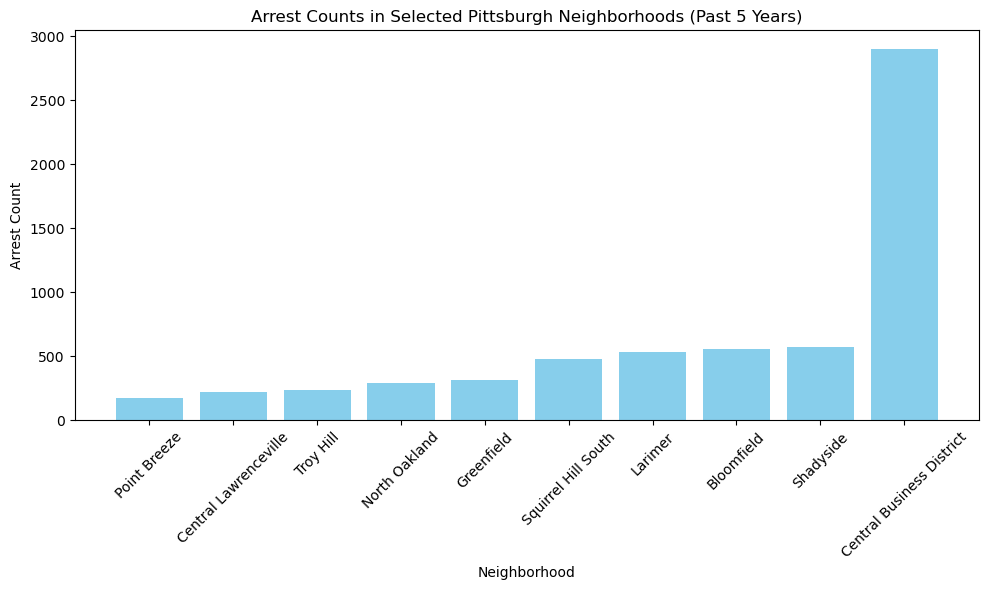

,neighborhood,arrest_count
0,Point Breeze,172
1,Central Lawrenceville,225
2,Troy Hill,240
3,North Oakland,288
4,Greenfield,315
5,Squirrel Hill South,476
6,Larimer,536
7,Bloomfield,558
8,Shadyside,574
9,Central Business District,2901


In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'Arrest.csv'
arrest_data = pd.read_csv(file_path)

# Convert ARRESTTIME to datetime
arrest_data['ARRESTTIME'] = pd.to_datetime(arrest_data['ARRESTTIME'], errors='coerce')

# Filter data for the last five years
current_year = datetime.now().year
five_years_ago = current_year - 5
recent_arrests = arrest_data[arrest_data['ARRESTTIME'].dt.year >= five_years_ago]

# Filter for arrests within Pittsburgh neighborhoods (excluding 'Outside City')
pittsburgh_arrests = recent_arrests[recent_arrests['INCIDENTNEIGHBORHOOD'] != 'Outside City']

# Neighborhood of interets
neighborhoods_of_interest = [
    'Central Business District',
    'Squirrel Hill South',
    'North Oakland',
    'Shadyside',
    'Troy Hill',
    'Point Breeze',
    'Bloomfield',
    'Central Lawrenceville',
    'Greenfield',
    'Larimer'
]

# Filter arrests for neighborhoods of interest
filtered_arrests = pittsburgh_arrests[pittsburgh_arrests['INCIDENTNEIGHBORHOOD'].isin(neighborhoods_of_interest)]

# Count arrests per neighborhood
arrest_counts = filtered_arrests['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['neighborhood', 'arrest_count']

# Sort arrest counts by count
sorted_arrest_counts = arrest_counts.sort_values(by='arrest_count').reset_index(drop=True)

# Find the neighborhood with the lowest crime rate
lowest_crime_neighborhood = sorted_arrest_counts.iloc[0]

# Display neighborhood with the lowest crime rate
print(f"The neighborhood with the lowest crime rate over the past five years is {lowest_crime_neighborhood['neighborhood']}.")

# Plot the arrest counts
plt.figure(figsize=(10, 6))
plt.bar(sorted_arrest_counts['neighborhood'], sorted_arrest_counts['arrest_count'], color='skyblue')
plt.title("Arrest Counts in Selected Pittsburgh Neighborhoods (Past 5 Years)")
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
sorted_arrest_counts


# **Zip Codes**

Central Business District: 15219

Squirrel Hill South: 15217

North Oakland: 15213, 15260

Shadyside: 15232

Troy Hill: 15222

Point Breeze: 15208, 15221

Bloomfield: 15224

Central Lawrenceville: 15201

Greenfield: 15207

Larimer: 15206


# **Food Inspections**

                neighborhood  medium_violations  high_violations  \
0                 Greenfield                150               57   
1      Central Lawrenceville                511              277   
2                  Shadyside                513              304   
3                 Bloomfield                535              319   
4                    Larimer                739              444   
5  Central Business District                952              464   
6        Squirrel Hill South               1094              559   
7               Point Breeze               1089              571   
8              North Oakland               1164              651   
9                  Troy Hill               1598              982   

   total_violations  
0               207  
1               788  
2               817  
3               854  
4              1183  
5              1416  
6              1653  
7              1660  
8              1815  
9              2580  


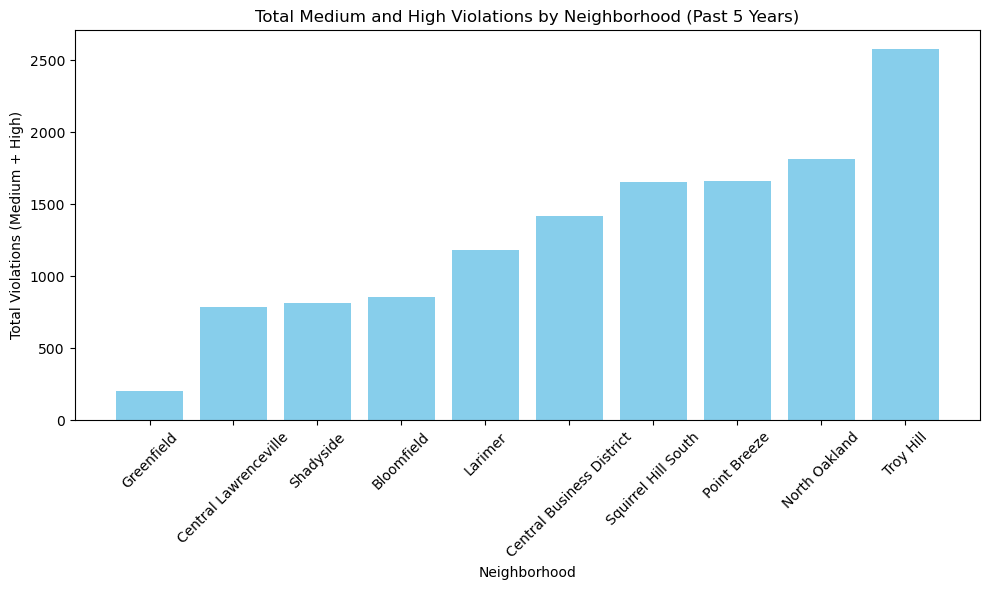

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Food_Inspections.csv"  
data = pd.read_csv(file_path)

# Convert inspection date column to datetime 
data['inspect_dt'] = pd.to_datetime(data['inspect_dt'], errors='coerce')

# Zip codes of interested neighborhoods
zip_codes_of_interest = {
    'Central Business District': [15219],
    'Squirrel Hill South': [15217],
    'North Oakland': [15213, 15260],
    'Shadyside': [15232],
    'Troy Hill': [15222],
    'Point Breeze': [15208, 15221],
    'Bloomfield': [15224],
    'Central Lawrenceville': [15201],
    'Greenfield': [15207],
    'Larimer': [15206]
}

# Filter for inspections within the last 5 years
five_years_ago = datetime.now().year - 5
recent_inspections = data[data['inspect_dt'].dt.year >= five_years_ago]

# Calculate violation counts by neighborhood
violation_counts = []
for neighborhood, zips in zip_codes_of_interest.items():
    neighborhood_data = recent_inspections[recent_inspections['zip'].isin(zips)]
    medium_violations = neighborhood_data[neighborhood_data['medium'] == 'T'].shape[0]
    high_violations = neighborhood_data[neighborhood_data['high'] == 'T'].shape[0]
    total_violations = medium_violations + high_violations
    violation_counts.append({
        'neighborhood': neighborhood,
        'medium_violations': medium_violations,
        'high_violations': high_violations,
        'total_violations': total_violations
    })

# DataFrame for violation counts
violation_counts_df = pd.DataFrame(violation_counts).sort_values(by='total_violations').reset_index(drop=True)

# Display violation counts
print(violation_counts_df)

# Total violations by neighborhood
plt.figure(figsize=(10, 6))
plt.bar(violation_counts_df['neighborhood'], violation_counts_df['total_violations'], color='skyblue')
plt.title("Total Medium and High Violations by Neighborhood (Past 5 Years)")
plt.xlabel("Neighborhood")
plt.ylabel("Total Violations (Medium + High)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Private Schools dataset:**

                Neighborhood  School Count
0  Central Business District             6
1        Squirrel Hill South             9
2              North Oakland            14
3                  Shadyside             5
4                  Troy Hill             5
5               Point Breeze            23
6                 Bloomfield             4
7      Central Lawrenceville             3
8                 Greenfield             2
9                    Larimer            14


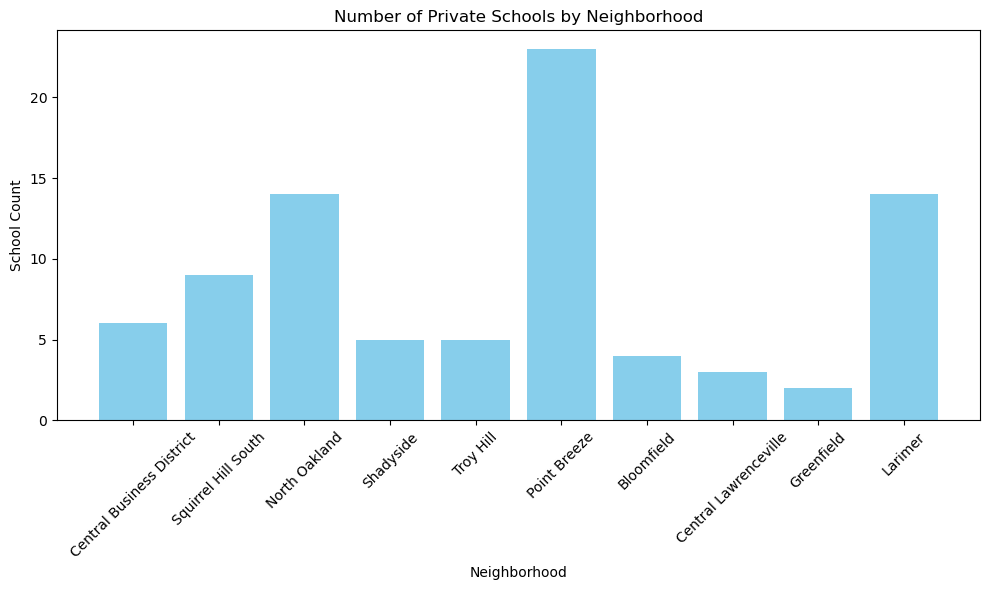

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the private schools dataset
file_path = 'Private_school.csv'
private_schools_data = pd.read_csv(file_path)

# neighborhoods and their zip codes
zip_codes_of_interest = {
    'Central Business District': [15219],
    'Squirrel Hill South': [15217],
    'North Oakland': [15213, 15260],
    'Shadyside': [15232],
    'Troy Hill': [15222],
    'Point Breeze': [15208, 15221],
    'Bloomfield': [15224],
    'Central Lawrenceville': [15201],
    'Greenfield': [15207],
    'Larimer': [15206]
}

# Count the number of private schools in each neighborhood
school_counts = {}
for neighborhood, zips in zip_codes_of_interest.items():
    neighborhood_schools = private_schools_data[private_schools_data['location_zip_code'].isin(zips)]
    school_counts[neighborhood] = neighborhood_schools.shape[0]

# Create a DataFrame for the school counts
school_counts_df = pd.DataFrame(list(school_counts.items()), columns=['Neighborhood', 'School Count'])

# Display the DataFrame
print(school_counts_df)

# Plot the number of private schools by neighborhood
plt.figure(figsize=(10, 6))
plt.bar(school_counts_df['Neighborhood'], school_counts_df['School Count'], color='skyblue')
plt.title("Number of Private Schools by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("School Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **The Best Neighborhood:**

In [3]:
import pandas as pd
data = {
    'neighborhood': [
        'Central Business District', 'Squirrel Hill South', 'North Oakland', 'Shadyside', 
        'Troy Hill', 'Point Breeze', 'Bloomfield', 'Central Lawrenceville', 
        'Greenfield', 'Larimer'
    ],
    'school_count': [6, 9, 14, 5, 5, 23, 4, 3, 2, 14],
    'arrest_count': [2901, 476, 288, 574, 240, 172, 558, 225, 315, 536],
    'total_violations': [207, 1653, 1183, 1815, 854, 788, 1660, 817, 1416, 2580]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate mean values for each column (school_count, arrest_count, total_violations)
mean_school_count = df['school_count'].mean()
mean_arrest_count = df['arrest_count'].mean()
mean_total_violations = df['total_violations'].mean()

# Checking if each neighborhood is above or below the mean for each metric
df['above_mean_schools'] = df['school_count'] >= mean_school_count
df['below_mean_arrests'] = df['arrest_count'] <= mean_arrest_count
df['below_mean_violations'] = df['total_violations'] <= mean_total_violations

# Sum the number of metrics each neighborhood meets (True values)
df['score'] = df[['above_mean_schools', 'below_mean_arrests', 'below_mean_violations']].sum(axis=1)

# Find all neighborhoods with the maximum score
max_score = df['score'].max()
best_neighborhoods = df[df['score'] == max_score]

# Display results
print("Full Data with Metrics:")
print(df)

print("\nBest Neighborhood(s) based on metrics:")
print(best_neighborhoods[['neighborhood', 'score']])
best_neighborhoods_sorted = best_neighborhoods.sort_values(by='arrest_count').iloc[0]
north_oakland_arrest_count = best_neighborhoods[best_neighborhoods['neighborhood'] == 'North Oakland']['arrest_count'].values[0]
point_breeze_arrest_count = best_neighborhoods[best_neighborhoods['neighborhood'] == 'Point Breeze']['arrest_count'].values[0]
arrest_count_difference = north_oakland_arrest_count - point_breeze_arrest_count

# Best neighborhood in comparison
print(f"The single best neighborhood based on lower arrest count and tie-breaking criterion:")
print(f"{best_neighborhoods_sorted['neighborhood']} has {arrest_count_difference} fewer arrests than North Oakland.")
print(best_neighborhoods_sorted[['neighborhood', 'arrest_count']])

Full Data with Metrics:
                neighborhood  school_count  arrest_count  total_violations  \
0  Central Business District             6          2901               207   
1        Squirrel Hill South             9           476              1653   
2              North Oakland            14           288              1183   
3                  Shadyside             5           574              1815   
4                  Troy Hill             5           240               854   
5               Point Breeze            23           172               788   
6                 Bloomfield             4           558              1660   
7      Central Lawrenceville             3           225               817   
8                 Greenfield             2           315              1416   
9                    Larimer            14           536              2580   

   above_mean_schools  below_mean_arrests  below_mean_violations  score  
0               False               False  

# **Conclution**

We used the mean value as our benchmark. For each category—crime rate, food/restaurant violations, and number of private schools—we first calculated the average. Then, we compared each neighborhood’s arrest rate, violation count, and number of schools to this benchmark. After completing the comparisons, we found that North Oakland and Point Breeze scored higher than the mean value. Among these two neighborhoods, Point Breeze has the lowest arrest rate. Thus, we selected Point Breeze as the best neighborhood among the ten we evaluated.